直線のあてはめ
===
by ほげにむし


---
$N$個のデータ : $(x_1,y_1), \cdots (x_N, y_N)$ 

---


これによく合う直線をあてはめたい。

pythonを使ってデータを見る
---



まず、データを定義しよう。pandasのデータフレームを利用する。

In [13]:
import pandas as pd
鉄データ =pd.DataFrame( {'密度'    :[2.8, 2.9, 3.0, 3.1, 3.2, 3.2, 3.2, 3.3, 3.4], 
                         '鉄含有量':[ 30,  26,  33,  31,  33,  35,  37,  36,  33]})

中身を見てみよう。pandasのデータフレームは表となって出力される。

In [2]:
鉄データ

,密度,鉄含有量
0,2.8,30
1,2.9,26
2,3.0,33
3,3.1,31
4,3.2,33
5,3.2,35
6,3.2,37
7,3.3,36
8,3.4,33


これを、散布図としてプロットしてみよう。
最初の行で図の出力をJupyterのWebインターフェイスに直接描画するように指定している。
pandasのobjectはplotのメソッドを持っていて、kindでプロットのスタイルを指定できる。

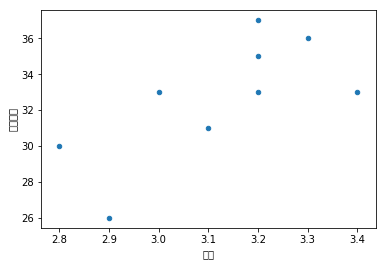

In [3]:
%matplotlib inline
鉄データ.plot(kind='scatter',x='密度',y='鉄含有量')

・・・漢字はフォントを設定しないと出てこない。今はこれを無視しよう。

Seabornという、美しくグラフを描画するライブラリもある。

これを使って、密度と鉄含有量それぞれの分布をみることができる。

xlim,ylimで縦横の描画領域を指定していることに気を付けてほしい。

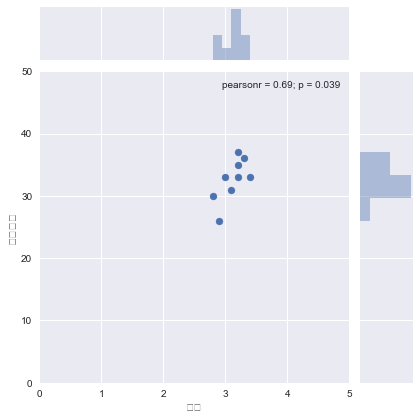

In [4]:
import seaborn as sns
sns.jointplot(x="密度", y="鉄含有量", data=鉄データ,xlim=(0, 5), ylim=(0, 50))

直線のあてはめもこれでできてしまう。

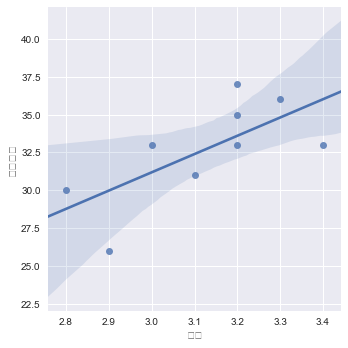

In [5]:
sns.lmplot(x="密度", y="鉄含有量", data=鉄データ)

x軸、y軸それぞれのヒストグラムを付け加えてみよう。

C:\Users\okuyama\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


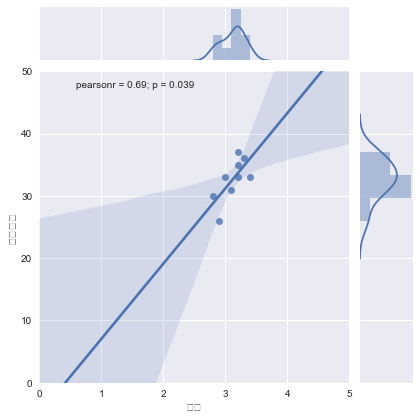

In [6]:
sns.jointplot(kind='reg',x="密度", y="鉄含有量", data=鉄データ,xlim=(0, 5), ylim=(0, 50))

サンプル点が少ないので怒られているが、今のところは問題がないので無視しよう。

鉄データのサマリーはdescribeメソッドで見ることができる。

In [7]:
鉄データ.describe()

,密度,鉄含有量
count,9.000000,9.000000
mean,3.122222,32.666667
std,0.192209,3.354102
min,2.800000,26.000000
25%,3.000000,31.000000
50%,3.200000,33.000000
75%,3.200000,35.000000
max,3.400000,37.000000


それぞれの項目の意味は分かるだろうか？

これまで、pandasとseabornのplot機能を使って直線をあてはめたが、直線に関する情報が図でしか読み取れない。

係数と切片を求めるために違う方法を使って最小二乗法で単回帰を求めてみよう。英語ではordinary least squares regressionと言い、pandasオブジェクトが持っているolsというメソッドで計算できる。

In [8]:
鉄model=pd.ols(x=鉄データ["密度"], y=鉄データ["鉄含有量"], intercept=True)

C:\Users\okuyama\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


どうやら将来的にこのメソッドはなくなってしまうようだが、今は無視しよう。interceptはTrueで切片を持ち、Falseで切片がが原点に設定される。線形回帰の「線形」は切片が原点であるということだ。切片が設定されていないと不便なので、interceptはTrueにしておく。結果は以下のようになる。

In [9]:
print(鉄model)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         9
Number of Degrees of Freedom:   2

R-squared:         0.4782
Adj R-squared:     0.4037

Rmse:              2.5901

F-stat (1, 7):     6.4161, p-value:     0.0391

Degrees of Freedom: model 1, resid 7

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    12.0677     4.7642       2.53     0.0391     2.7299    21.4055
     intercept    -5.0113    14.8999      -0.34     0.7465   -34.2151    24.1925
---------------------------------End of Summary---------------------------------



直線 $y=12.1x - 5.01$ が一番近いものとして選ばれた。教科書と一致した！

統計のライブラリであるstatmodelsも使ってみよう。

In [10]:
import statsmodels.api as sm

鉄model=sm.OLS(鉄データ['鉄含有量'], sm.add_constant(鉄データ['密度']))
鉄結果=鉄model.fit()
鉄結果.summary()

C:\Users\okuyama\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   鉄含有量   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     6.416
Date:                Tue, 07 Mar 2017   Prob (F-statistic):             0.0391
Time:                        10:40:33   Log-Likelihood:                -20.205
No. Observations:                   9   AIC:                             44.41
Df Residuals:                       7   BIC:                             44.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.0113     14.900     -0.336      0.746       -40.244    30.221
密度            12.0677      4.764      2.533      0.039         0.802    23.333
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.608
Skew:                          -0.396   Prob(JB):                        0.738
Kurtosis:                       2.003   Cond. No.                         59.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

尖度を求めるには、もっとサンプルが必要であると怒られた。実際のデータはもっと点があるはずであるが、教科書は手計算ができるようにサンプルを少なくしてあるので、仕方がないだろう。

表を見てみよう。
2番目の表のconstが切片、密度がxの係数(coefficient)である。こちらも、教科書と一致した。

それでは、得られた直線と、元のデータを合わせてplotしてみよう。
matplotlib.pyplotの関数を直接呼んで、直線を描画する。

const    -5.011278
密度       12.067669
dtype: float64


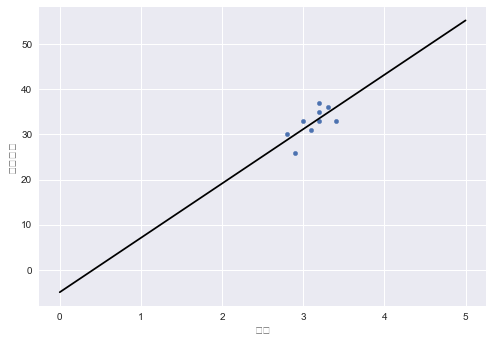

In [11]:
import matplotlib.pyplot as plt
print(鉄結果.params)
鉄データ.plot(kind='scatter',x='密度',y='鉄含有量')
plt.plot( [0, 5], 鉄結果.predict( sm.add_constant([0, 5]) ), color='k'  )

これで、直線回帰ができた！次回はほかのデータでも試してみよう。